# 회귀(regression)

## k-최근접 이웃 회귀
- KNeighborsRegressor
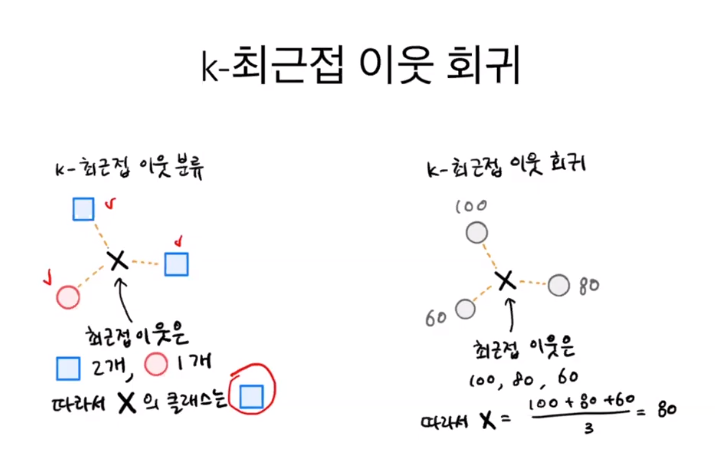

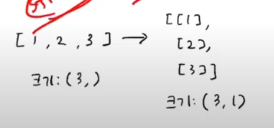

In [5]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [6]:
# 이진분류가 아니어도 가능

from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(
perch_length,perch_weight,random_state=42)

train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1) #-1은 나머지라고 생각하면 됨

In [7]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

# 회귀 모델 훈련

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)


0.992809406101064

In [14]:
knr.predict(test_input)

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [11]:
from sklearn.metrics import mean_absolute_error

test_prediction=knr.predict(test_input)
mae=mean_absolute_error(test_target,test_prediction)
print(mae)
# 19g 오차난다고 볼수있음

19.157142857142862


# 과대 적합과 과소 적합

In [16]:
knr.score(train_input,train_target) #일반적으로 train 이 높아야됨. 과소적합, 반대면 너무 훈련세트에 맞게 되면 과대 적합이라고 한다.

0.9698823289099254

In [17]:
knr.score(test_input,test_target)

0.992809406101064

# 이웃 개수 줄이기
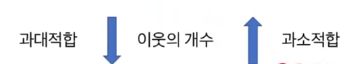

In [18]:
knr.n_neighbors=3

knr.fit(train_input,train_target)

print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

#개수를 줄이니 과적합!
# train 점수가 높다

0.9804899950518966
0.9746459963987609
